In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix

### load Iris_Data

In [4]:
iris_data=pd.read_csv('IRIS.csv')

In [6]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory data analysis: (EDA)

In [1]:
# The percentage of each category

In [8]:
# Count the occurrences of each category in the 'species' column
category_counts = iris_data['species'].value_counts()

# Convert the Series to a DataFrame
category_counts_df = category_counts.reset_index()

# Rename the columns
category_counts_df.columns = ['species', 'count']

print(category_counts_df)


           species  count
0      Iris-setosa     50
1  Iris-versicolor     50
2   Iris-virginica     50


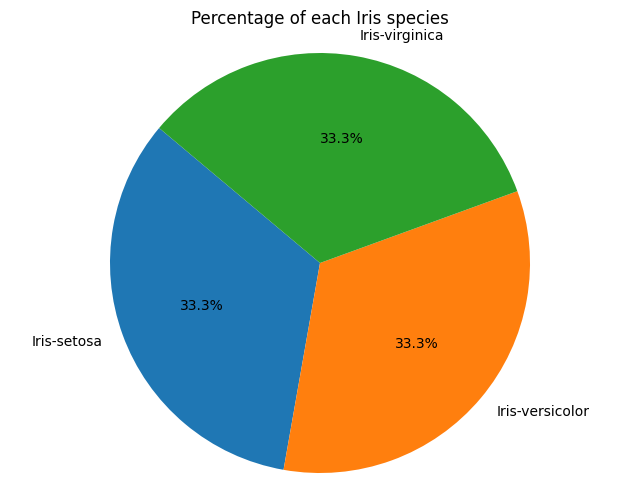

In [15]:
import matplotlib.pyplot as plt

# Visualize the results with a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts_df['count'], labels=category_counts_df['species'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of each Iris species')
plt.show()


In [17]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


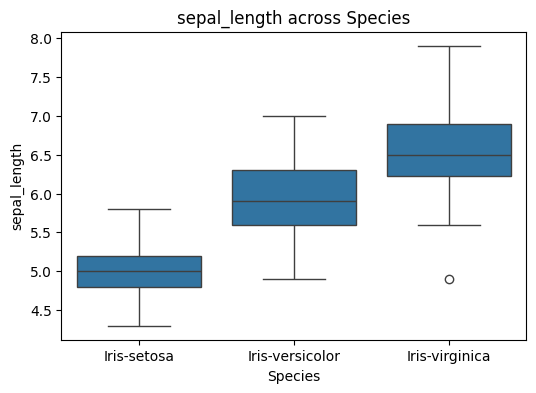

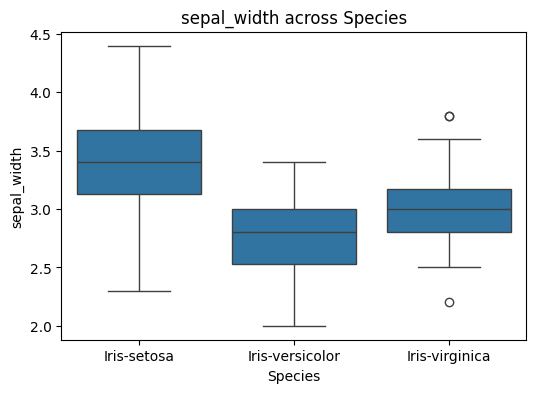

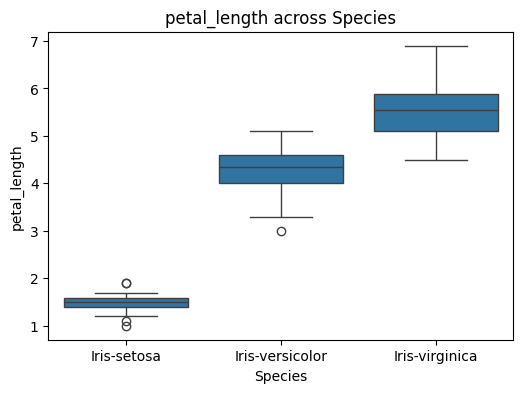

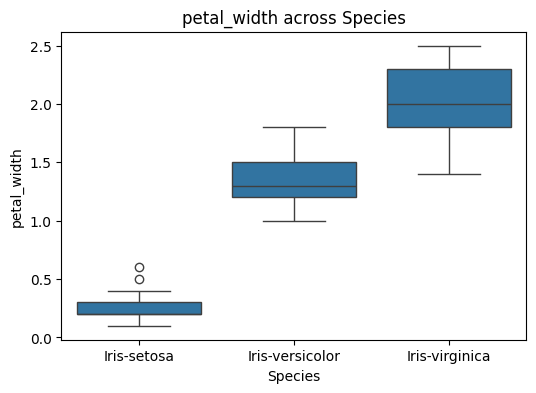

In [23]:
# Box plots for numerical features
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=iris_data, x='species', y=feature)
    plt.title(f'{feature} across Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.show()


From these visualizations, we can see that there is a big difference between the types. There is little similarity between **Versicolor** and **Virginia** especially petal length and sepal width.

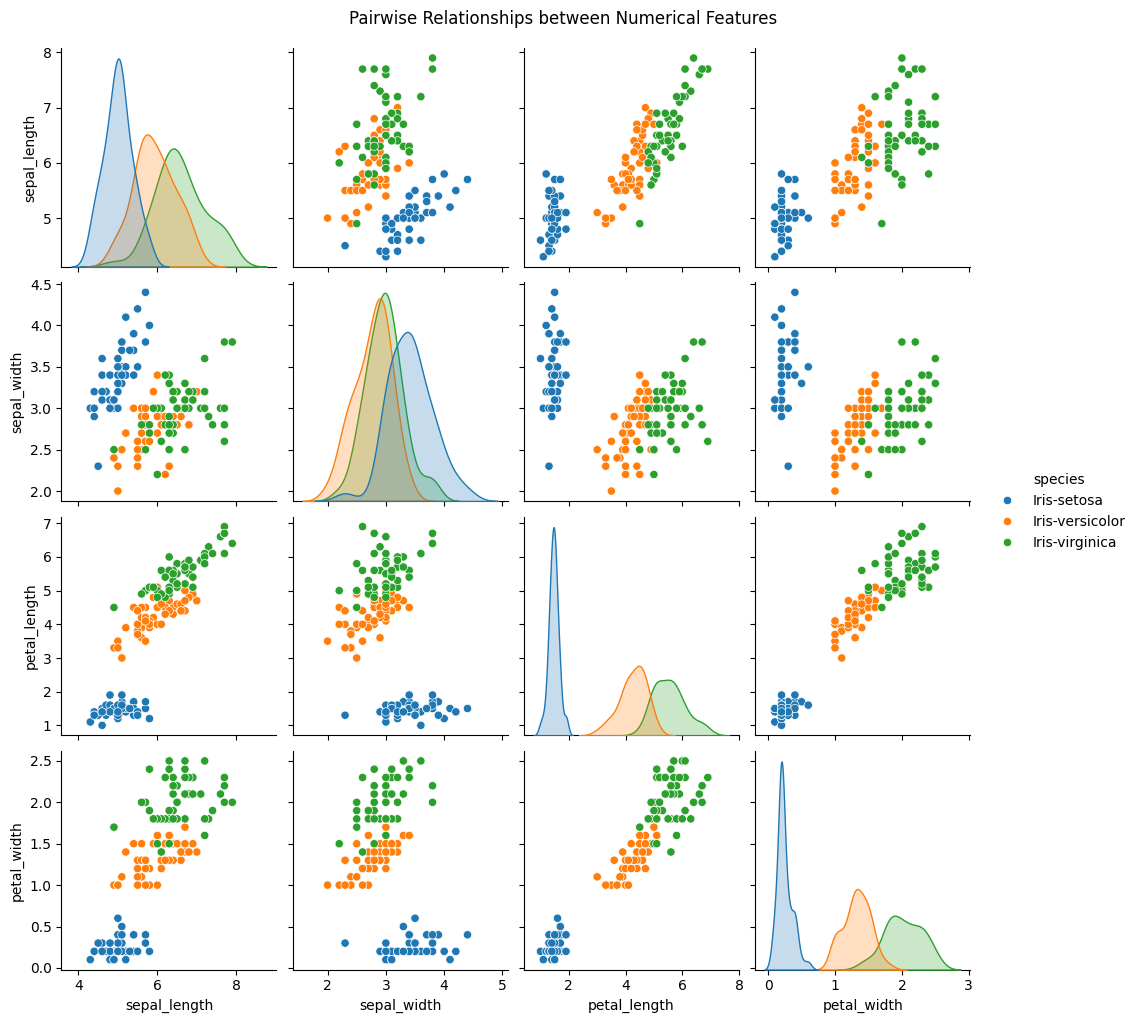

In [21]:
# Pairplot for pairwise relationships between numerical features
sns.pairplot(iris_data, hue='species', diag_kind='kde')
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()

- Visualization results:
1.  **Iris_setosa** has a long sepal and petal but its width is small compared to other species.
2.  **Verginica** and **Versicolor** have generally similar characteristics

### Data Preprocessing:

In [27]:
# check NaN values

In [26]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
# The correlation between numerical features

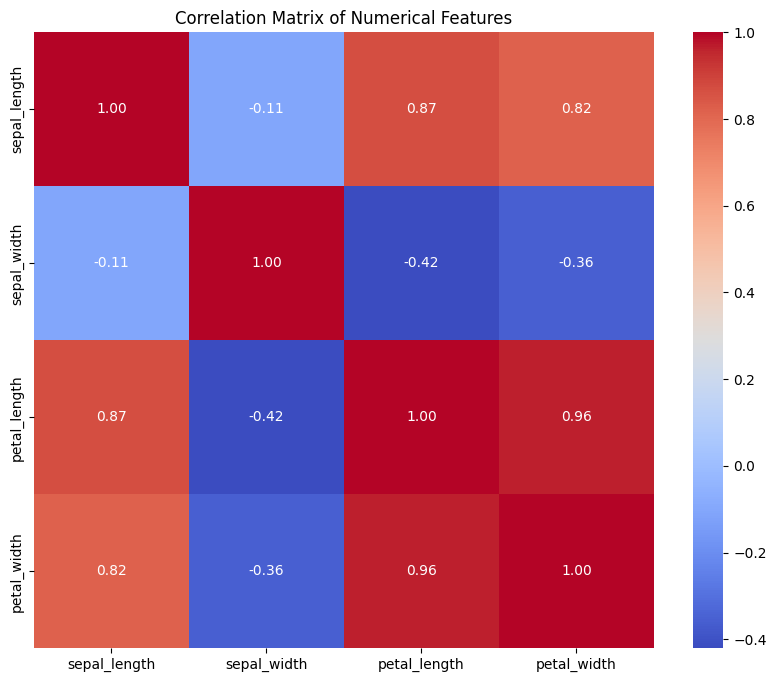

In [30]:
# Assuming you have a DataFrame called 'df' with numerical features: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calculate the correlation matrix
correlation_matrix = iris_data[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()


- There is no linear relationship between sepal length and sepal width.
- There is a strong relationship between petal width and length.
- There is a linear relationship between sepal length, petal length, and petal width.
- The low negative correlation (close to -0.5) between sepal width, petal width, and petal length indicates that they tend to move in opposite directions.

In [32]:
# Encoding the Target variable

In [33]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
label_encoder = LabelEncoder()
iris_data['Target'] = label_encoder.fit_transform(iris_data['species'])


In [38]:
# Flower categories encoding

In [37]:
iris_data['encoded_column'].unique()

array([0, 1, 2])

### Model selection

In [44]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [45]:
iris_data.drop('species', axis=1, inplace=True)

In [49]:
# Splitting the data
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy:  {accuracy:.2f}')


Logistic Regression: Accuracy:  1.00
Random Forest: Accuracy:  1.00
Support Vector Machine: Accuracy:  1.00


In [52]:
# Let's evaluate and verify the robustness of the models

Logistic Regression: Cross-Validation Mean Accuracy: 0.96 (±0.04)
Confusion Matrix for Logistic Regression:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


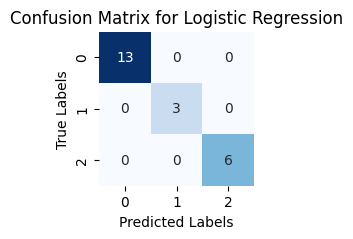

Random Forest: Cross-Validation Mean Accuracy: 0.94 (±0.04)
Confusion Matrix for Random Forest:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


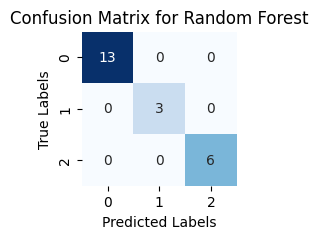

Support Vector Machine: Cross-Validation Mean Accuracy: 0.95 (±0.04)
Confusion Matrix for Support Vector Machine:
[[13  0  0]
 [ 0  3  0]
 [ 0  0  6]]


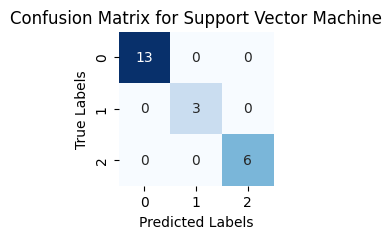

In [72]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Model Selection and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

for name, model in models.items():
    # Cross-validation on the training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name}: Cross-Validation Mean Accuracy: {np.mean(cv_scores):.2f} (±{np.std(cv_scores):.2f})')

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for {name}:\n{cm}')

    # Plot Confusion Matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

It looks like all three models (Logistic Regression, Random Forest, Support Vector Machine) achieved high cross-validation mean accuracy scores, indicating good performance on dataset. Additionally, the confusion matrices show that each model made correct predictions for all classes, as indicated by the non-zero values along the diagonal.

### Model aploading

In [73]:
from joblib import dump

# Assuming 'logistic_model' is your trained Logistic Regression model
dump(models['Logistic Regression'], 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']